In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import imageio
import imageio.v2 as imageio
import cv2
import os
import scipy.io
from scipy.optimize import minimize
import math
import skimage.restoration
from scipy.ndimage import gaussian_filter
from skimage.restoration import denoise_tv_bregman
from PIL import Image
import scipy.io as sio

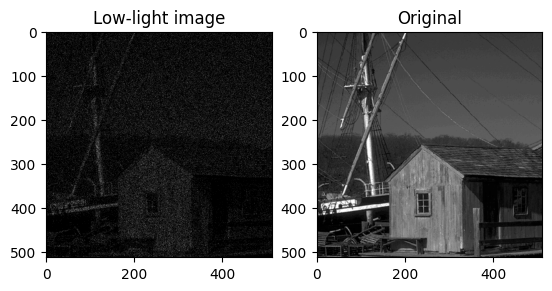

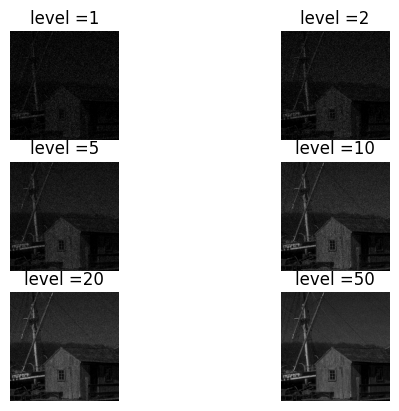

In [ ]:
# Ruta completa a la imagen en Google Drive
imagen_path = '/content/drive/MyDrive/Optimización Convexa/Copia de 3.gif'

# Verificar si el archivo existe
if os.path.exists(imagen_path):
    # Cargamos la imagen y la convertimos a valores entre 0 y 1
    im = imageio.imread(imagen_path) / 255.0
else:
    print(f"La imagen {imagen_path} no existe.")



# Generamos una imagen con ruido de Poisson
y = np.random.poisson(im * 2)

# Mostramos la imagen con ruido y la original
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(y, cmap='gray')
plt.title('Low-light image')
plt.subplot(1, 2, 2)
plt.imshow(im, cmap='gray')
plt.title('Original')

# Generamos y mostramos imágenes con diferentes niveles de ruido de Poisson
levels = [1, 2, 5, 10, 20, 50]
plt.figure()
for i, level in enumerate(levels):
    plt.subplot(3, 2, i+1)
    plt.imshow(np.random.poisson(im * level), cmap='gray')
    plt.axis('off')
    plt.title('level =' + str(level))

plt.show()

In [19]:
def objective_function(x, Y, v, u, level, rho, un):
    return (rho*(v - u) - level * un + ((rho*(v - u) - level * un)** 2 + 4 * rho * Y) ** 0.5)/(2 * rho)

def admm(y, rho, l, level, max_iters=500, tol=1e-6):
    M, N = y.shape

    # Dimensiones de los vectores
    x = np.zeros((M,N))
    v = np.zeros((M,N))
    u = np.zeros((M,N))
    un = np.ones((M,N))

    for iteration in range(max_iters):
        # Actualización de x
        x = objective_function(x, y, v, u, level, rho, un)

        # Actualización de a
        v_prev = v.copy()
        v = denoise_tv_bregman(x + u, np.sqrt(l/rho))

        # Actualización de u y w
        u = u + x - v

        # Verificar convergencia
        if np.linalg.norm(v - v_prev) < tol:
            break
    return x

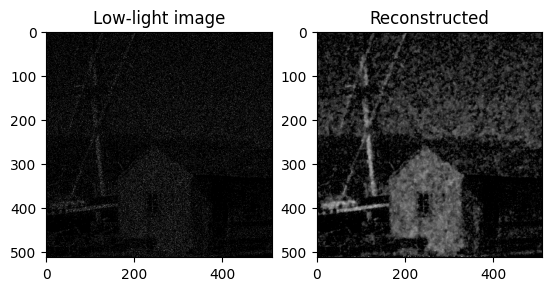

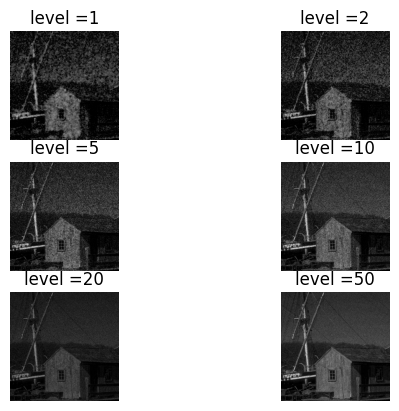

In [ ]:
rho = 0.9
l = 0.01
# Ruta completa a la imagen en Google Drive
imagen_path = '/content/drive/MyDrive/Optimización Convexa/Copia de 3.gif'

# Verificar si el archivo existe
if os.path.exists(imagen_path):
    # Cargamos la imagen y la convertimos a valores entre 0 y 1
    im = imageio.imread(imagen_path) / 255.0
else:
    print(f"La imagen {imagen_path} no existe.")

# Generamos una imagen con ruido de Poisson
lv = 1
y = np.random.poisson(im * lv)
x = admm(y, rho, l, lv)
# Mostramos la imagen con ruido y la original
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(y, cmap='gray')
plt.title('Low-light image')
plt.subplot(1, 2, 2)
plt.imshow(x, cmap='gray')
plt.title('Reconstructed')


# Guardamos la figura como una imagen
plt.savefig('image.png', dpi=300)

# Generamos y mostramos imágenes con diferentes niveles de ruido de Poisson
levels = [1, 2, 5, 10, 20, 50]
plt.figure()
for i, level in enumerate(levels):
    plt.subplot(3, 2, i+1)
    plt.imshow(admm(np.random.poisson(im * level), rho, l, level), cmap='gray')
    plt.axis('off')
    plt.title('level =' + str(level))

plt.show()

In [ ]:
rho = 0.9
l = 0.01
lvl_img = [1, 2, 5, 10, 20, 50]
n_img = [1,2,3]
imgs = []
img_re = {}

for i in lvl_img:
  for j in n_img:
    # Ruta completa a la imagen en Google Drive
    imagen_path = '/content/drive/MyDrive/Optimización Convexa/Testing_images/lvl' + str(i) + '/'  + 'im_' + str(j) + '_level_' + str(i) + '.png'

    # Verificar si el archivo existe
    if os.path.exists(imagen_path):
      # Cargamos la imagen y la convertimos a valores entre 0 y 1
      im = imageio.imread(imagen_path) / 255.0
    else:
      print(f"La imagen {imagen_path} no existe.")

    x = admm(im, rho, l, i)
    clave = f'im' + str(j) + '_lvl_' + str(i)
    img_re[clave] = x
    imgs.append(x)

#sio.savemat('/content/drive/MyDrive/Optimización Convexa/Testing_images/imagenes_r_2.mat', img_re)

plt.figure()
for i in range(0, 3):
  plt.subplot(1, 3, i+1)
  plt.imshow(imgs[i], cmap='gray')
  plt.axis('off')
plt.show()